 #  <center> YELO BANK TECHNICAL SKILL TEST 🔔

# Task 1 
###### (Use loan_data.xlsx  file for Task 1) 📌




Title | Definition
---|---------
`CUSTOMER_NO`| id of costumer
`BEGIN_DATE` |  open date of loan
`END_DATE` | close date of loan  
`CLOSE_DATE` | actual close date of loan
`BRANCH_NAME` | name of product
`INTEREST_RATE` | loan interest rate(annual)
`BIRTH_DATE` |  birth date of customer
`PRODUCT_NAME` | name of product
`AMOUNT` |  given amount of loan
`REMAIN_AMOUNT` | customer's debt to bank
`CATEGORY` |  cutomer category (GB -good bank / BB- bad bank) 
`GSM_NO` |  Mobile Phone 



 ## <center> Customer Segmentation

##  1. Data cleaning & Preparation 🧹
### Tips for data cleaning : 
 ##### Pay attention  ❗
- Data types
- Null values
- Extreme values
- Duplicates
- Correct telephone number format (ex.: 994752000000 , numbers should be start with 99475, 99476, 99433 )

## 2. EDA ( Exploratory Data Analysis) 📈
### Tips :
1. Yearly and monthly sales amount and count (using pivot_table func.)
2. Active & non-active customer distribution by product names
3. Your approach 🙂 (mandatory)

## 3. Segmentation for loan offer  🙋🏻🙋🏻‍♂️
##### Only these customers are able to take loan:

1. Age between 25 and 64
2. Category not in "BB"
3. Branch name not like "UPA"
4. Don't have active loan or remain amount < 60 %

### After defining your segment follow this steps :

- Split your segment into Target and Test customers
- Test clients should be 10 % of segment
- Use stratified sampling method for choosing test clients
- Show them as by creating a new column named as "TYPE"






# <center> Task 2

#### SQL task  ==> check attached excel file 

# <center> Task 3

## Insight Finding 📝

Analyze and visualize data and present your findings (preferably PPT)

Prepare the business proposal using data set provided in PYTHON task. Final presentation need to include following insights:


1.	Customer Segmentations and their profile (Exp. Customer between age 25-30 majorly set to require loans between X-Y AZN with Z month period)
2.	Top 3 customer segments which can increase sales if targeted properly. (Exp. Students can be targeted during back to school period as they are not targeted properly and have less risk based on data)
3.	The new bank product to increase the sales and cover customers need. ( Exp. Students credit X AZN with Y period can be attractive and cover majority of customer base.)


###### Note: Business proposal need to be part of business story telling within presentation.

### <center> GOOD LUCK!

## <center> THANKS MAN 🤝

# Task 1

## Data cleaning & Preparation 🧹

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_excel('loan_data.xlsx')
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO
0,462598,20-03-1984,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,GB,994758000022
1,469638,01-12-1977,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,GB,994758000023
2,489282,18-09-1997,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,GB,994758000025
3,490443,03-01-1987,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,GB,994758000026
4,331469,15-09-1989,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,GB,994758000027
...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,06-06-1970,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,NaN
20070,474877,23-01-1988,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628
20071,812387,18-01-1998,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,NaN
20072,202641,24-06-1959,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,NaN


In [3]:
df.describe()

,CUSTOMER_NO,BEGIN_DATE,END_DATE,CLOSE_DATE,INTEREST_RATE,AMOUNT,REMAIN_AMOUNT
count,20074.000000,20074,20074,8744,20074.000000,20074.000000,20074.000000
mean,518376.961144,2022-11-27 16:06:58.929958912,2025-07-12 18:27:22.004583168,2023-02-06 19:14:46.001829888,16.226243,9938.329899,4292.121747
min,12702.000000,2021-01-14 00:00:00,2024-02-15 00:00:00,2021-03-09 00:00:00,4.000000,300.000000,0.000000
25%,404840.500000,2022-05-12 00:00:00,2024-09-12 00:00:00,2022-09-09 00:00:00,14.900000,4000.000000,0.000000
50%,519707.500000,2023-01-10 00:00:00,2025-05-19 00:00:00,2023-04-06 00:00:00,16.000000,7000.000000,1015.275000
75%,665035.000000,2023-08-04 00:00:00,2026-03-16 00:00:00,2023-08-31 00:00:00,17.000000,13000.000000,5787.732500
max,824158.000000,2023-12-30 00:00:00,2028-11-30 00:00:00,2023-12-30 00:00:00,29.000000,200000.000000,105080.830000
std,184675.378399,NaN,NaN,NaN,2.305223,9229.274894,7251.010323


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUSTOMER_NO    20074 non-null  int64         
 1   BIRTH_DATE     20074 non-null  object        
 2   BEGIN_DATE     20074 non-null  datetime64[ns]
 3   END_DATE       20074 non-null  datetime64[ns]
 4   CLOSE_DATE     8744 non-null   datetime64[ns]
 5   BRANCH_NAME    20074 non-null  object        
 6   INTEREST_RATE  20074 non-null  float64       
 7   PRODUCT_NAME   20074 non-null  object        
 8   AMOUNT         20074 non-null  float64       
 9   REMAIN_AMOUNT  20074 non-null  float64       
 10  CATEGORY       20074 non-null  object        
 11  GSM_NO         19036 non-null  object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [5]:
df.isna().sum()

CUSTOMER_NO          0
BIRTH_DATE           0
BEGIN_DATE           0
END_DATE             0
CLOSE_DATE       11330
BRANCH_NAME          0
INTEREST_RATE        0
PRODUCT_NAME         0
AMOUNT               0
REMAIN_AMOUNT        0
CATEGORY             0
GSM_NO            1038
dtype: int64

In [6]:
df.dtypes

CUSTOMER_NO               int64
BIRTH_DATE               object
BEGIN_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CLOSE_DATE       datetime64[ns]
BRANCH_NAME              object
INTEREST_RATE           float64
PRODUCT_NAME             object
AMOUNT                  float64
REMAIN_AMOUNT           float64
CATEGORY                 object
GSM_NO                   object
dtype: object

In [7]:
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    print(f"\nSample values in {col}:")
    print(df[col].head())


Sample values in BIRTH_DATE:
0    20-03-1984
1    01-12-1977
2    18-09-1997
3    03-01-1987
4    15-09-1989
Name: BIRTH_DATE, dtype: object

Sample values in BEGIN_DATE:
0   2021-05-04
1   2021-06-14
2   2021-09-01
3   2021-09-06
4   2021-09-10
Name: BEGIN_DATE, dtype: datetime64[ns]

Sample values in END_DATE:
0   2024-05-04
1   2025-03-14
2   2024-09-01
3   2024-09-06
4   2024-09-10
Name: END_DATE, dtype: datetime64[ns]

Sample values in CLOSE_DATE:
0          NaT
1   2023-09-29
2   2022-03-16
3   2023-05-18
4   2021-12-06
Name: CLOSE_DATE, dtype: datetime64[ns]


In [8]:
null_analysis = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'null count': null_analysis,
    'null percentage': null_percentages
})
print(null_summary)

               null count  null percentage
CUSTOMER_NO             0             0.00
BIRTH_DATE              0             0.00
BEGIN_DATE              0             0.00
END_DATE                0             0.00
CLOSE_DATE          11330            56.44
BRANCH_NAME             0             0.00
INTEREST_RATE           0             0.00
PRODUCT_NAME            0             0.00
AMOUNT                  0             0.00
REMAIN_AMOUNT           0             0.00
CATEGORY                0             0.00
GSM_NO               1038             5.17


In [9]:
def analyze_phone_numbers(df):
    valid_phones = df['GSM_NO'].dropna().astype(str)
    prefix_99475 = valid_phones.str.startswith('99475').sum()
    prefix_99476 = valid_phones.str.startswith('99476').sum()
    prefix_99433 = valid_phones.str.startswith('99433').sum()
    total_phones = len(df)
    missing_phones = df['GSM_NO'].isna().sum()
    valid_format = prefix_99475 + prefix_99476 + prefix_99433
    invalid_format = len(valid_phones) - valid_format

    print("=== Phone Number Analysis ===")
    print(f"Total records: {total_phones}")
    print(f"Missing numbers: {missing_phones}")
    print(f"Valid format: {valid_format}")
    print(f"Invalid format: {invalid_format}")
    print("\nPrefix Distribution:")
    print(f"99475 prefix: {prefix_99475}")
    print(f"99476 prefix: {prefix_99476}")
    print(f"99433 prefix: {prefix_99433}")

analyze_phone_numbers(df)

=== Phone Number Analysis ===
Total records: 20074
Missing numbers: 1038
Valid format: 18819
Invalid format: 217

Prefix Distribution:
99475 prefix: 7231
99476 prefix: 5837
99433 prefix: 5751


In [10]:
def validate_phone(number):
    if pd.isna(number):
        return False
    number = str(number)
    return (number.startswith('99475') or 
            number.startswith('99476') or 
            number.startswith('99433'))

df['VALID_PHONE'] = df['GSM_NO'].apply(validate_phone)

In [11]:
customer_loan_counts = df['CUSTOMER_NO'].value_counts()
customers_with_multiple_loans = customer_loan_counts[customer_loan_counts > 1]

print(f"unique customers: {len(customer_loan_counts)}")
print(f"multiple loan customers: {len(customers_with_multiple_loans)}")
print(customer_loan_counts.value_counts().sort_index())

unique customers: 17160
multiple loan customers: 2398
count
1     14762
2      2018
3       299
4        55
5        16
6         5
7         1
8         2
9         1
17        1
Name: count, dtype: int64


In [12]:
df['IS_ACTIVE'] = df['CLOSE_DATE'].isna()
df['LOAN_DURATION'] = ((df['END_DATE'] - df['BEGIN_DATE']).dt.days / 30).round()

In [13]:
df['Loan_Status'] = 'Active'
df.loc[df['CLOSE_DATE'].notna(), 'Loan_Status'] = 'Closed'

In [14]:
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
# age
df['AGE'] = (datetime.now() - df['BIRTH_DATE']).dt.days / 365.25

def get_age_segment(age):
    if age < 25:
        return 'Young (<25)'
    elif age <= 30:
        return 'Young Professional (25-30)'
    elif age <= 40:
        return 'Early Career (31-40)'
    elif age <= 50:
        return 'Mid Career (41-50)'
    elif age <= 64:
        return 'Late Career (51-64)'
    else:
        return 'Senior (65+)'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)


df['REMAIN_PERCENTAGE'] = (df['REMAIN_AMOUNT'] / df['AMOUNT']) * 100

# criteria
eligible_customers = df[
    (df['AGE'] >= 25) & 
    (df['AGE'] <= 64) &
    (df['CATEGORY'] != 'BB') &
    (df['BRANCH_NAME'] != 'UPA') &
    ((df['Loan_Status'] == 'Closed') | (df['REMAIN_PERCENTAGE'] < 60))
].copy()

df.tail()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,VALID_PHONE,IS_ACTIVE,LOAN_DURATION,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,NaN,False,False,37.0,Closed,54.617385,Late Career (51-64),0.000000
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628,True,True,37.0,Active,36.985626,Early Career (31-40),94.092941
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,NaN,False,True,24.0,Active,26.997947,Young Professional (25-30),96.785800
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,NaN,False,True,11.0,Active,65.568789,Senior (65+),54.034000
20073,522302,1989-10-29,2022-02-23,2025-02-23,NaT,O,17.0,İstehlak kredit (Cash),7800.0,3341.76,GB,NaN,False,True,37.0,Active,35.219713,Early Career (31-40),42.843077


In [15]:
def get_loan_range(amount):
    if amount < 5000:
        return 'Small (<5K AZN)'
    elif amount <= 10000:
        return 'Medium (5K-10K AZN)'
    else:
        return 'Large (>10K AZN)'

df['LOAN_RANGE'] = df['AMOUNT'].apply(get_loan_range)
loan_preferences = pd.crosstab(df['AGE_SEGMENT'], df['LOAN_RANGE'], normalize='index') * 100

loan_preferences.round(2)

LOAN_RANGE,Large (>10K AZN),Medium (5K-10K AZN),Small (<5K AZN)
AGE_SEGMENT,,,
Early Career (31-40),33.65,36.30,30.06
Late Career (51-64),32.00,40.16,27.84
Mid Career (41-50),38.68,34.38,26.94
Senior (65+),21.36,39.81,38.83
Young (<25),15.25,25.89,58.87
Young Professional (25-30),21.71,35.71,42.58


=== outliers ===

AMOUNT statistics:
count     20074.000000
mean       9938.329899
std        9229.274894
min         300.000000
25%        4000.000000
50%        7000.000000
75%       13000.000000
max      200000.000000
Name: AMOUNT, dtype: float64


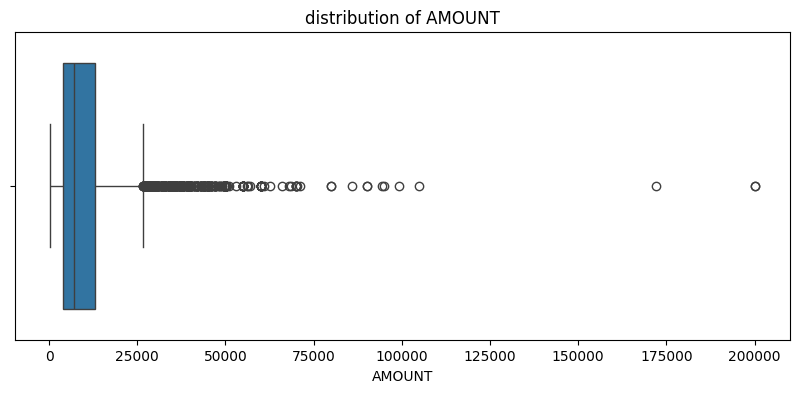


INTEREST_RATE statistics:
count    20074.000000
mean        16.226243
std          2.305223
min          4.000000
25%         14.900000
50%         16.000000
75%         17.000000
max         29.000000
Name: INTEREST_RATE, dtype: float64


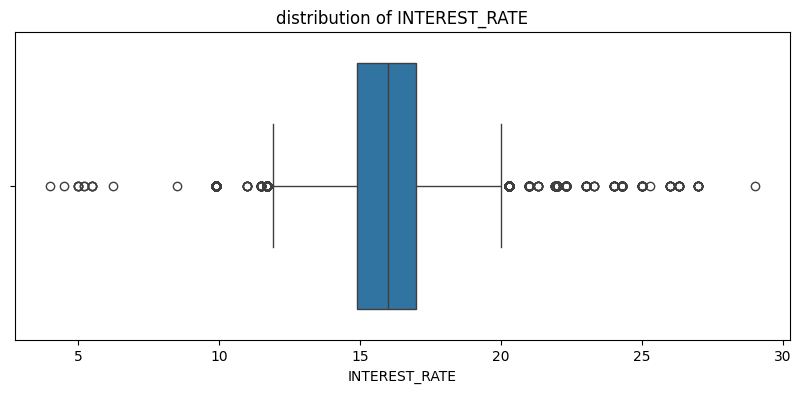


REMAIN_AMOUNT statistics:
count     20074.000000
mean       4292.121747
std        7251.010323
min           0.000000
25%           0.000000
50%        1015.275000
75%        5787.732500
max      105080.830000
Name: REMAIN_AMOUNT, dtype: float64


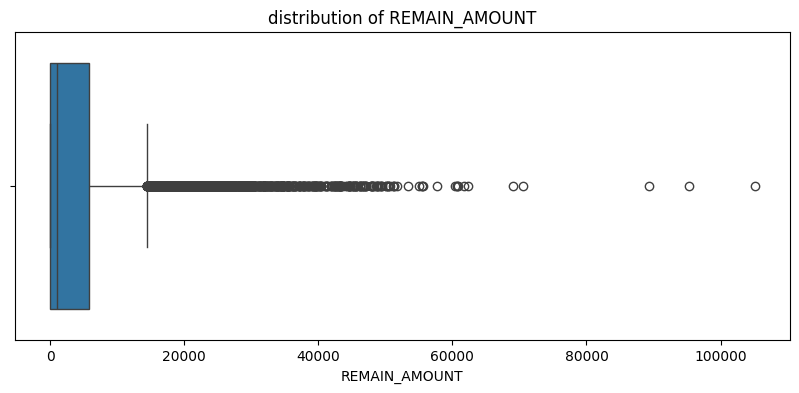

In [16]:
numeric_columns = ['AMOUNT', 'INTEREST_RATE', 'REMAIN_AMOUNT']

print("=== outliers ===")
for col in numeric_columns:
    print(f"\n{col} statistics:")
    print(df[col].describe())
    
    plt.figure(figsize=(10, 4))
    plt.title(f"distribution of {col}")
    sns.boxplot(x=df[col])
    plt.show()

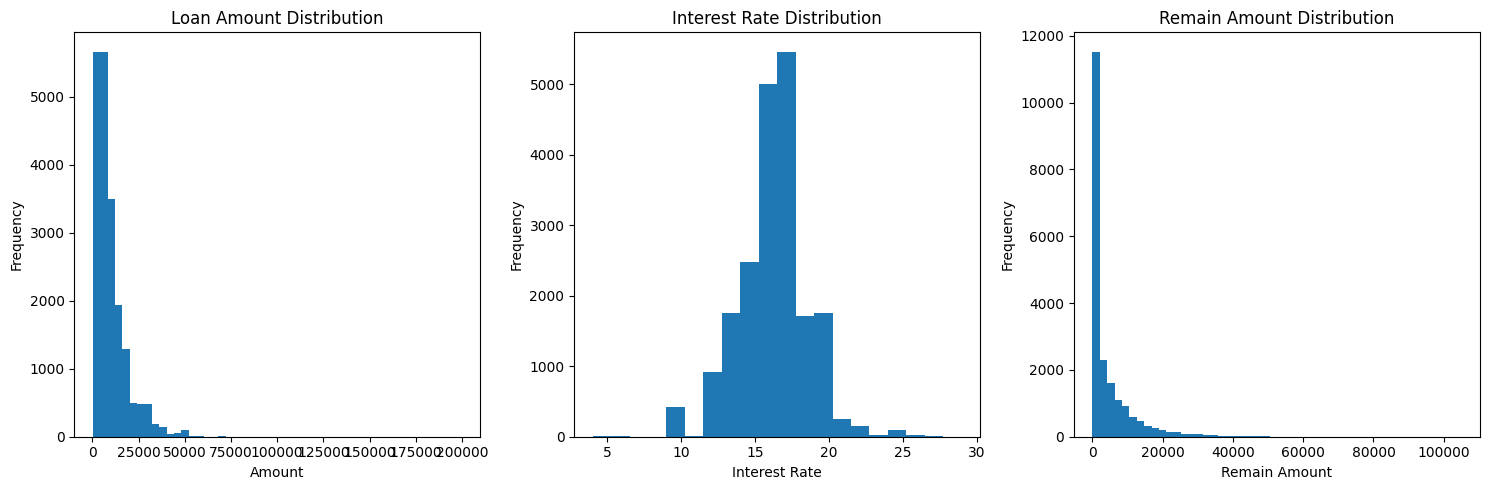

In [17]:
plt.figure(figsize=(15, 5))

# amount 
plt.subplot(1, 3, 1)
plt.hist(df['AMOUNT'], bins=50)
plt.title('Loan Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# interest rate
plt.subplot(1, 3, 2)
plt.hist(df['INTEREST_RATE'], bins=20)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

# remain amount
plt.subplot(1, 3, 3)
plt.hist(df['REMAIN_AMOUNT'], bins=50)
plt.title('Remain Amount Distribution')
plt.xlabel('Remain Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]

# outlier summary
for column in ['AMOUNT', 'INTEREST_RATE', 'REMAIN_AMOUNT']:
    outliers = identify_outliers(df, column)
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")


Outliers in AMOUNT:
Number of outliers: 1162
Percentage of outliers: 5.79%

Outliers in INTEREST_RATE:
Number of outliers: 1825
Percentage of outliers: 9.09%

Outliers in REMAIN_AMOUNT:
Number of outliers: 1624
Percentage of outliers: 8.09%


In [19]:
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Missing Phone Numbers',
        'Invalid Phone Format',
        'Customers with Multiple Loans',
        'Min Loan Amount',
        'Max Loan Amount',
        'Min Interest Rate',
        'Max Interest Rate',
        'Min Remain Amount',
        'Max Remain Amount'
    ],
    'Value': [
        len(df),
        df['GSM_NO'].isna().sum(),
        len(df['GSM_NO'].dropna()) - (df['GSM_NO'].astype(str).str.startswith('99475').sum() + 
                                     df['GSM_NO'].astype(str).str.startswith('99476').sum() + 
                                     df['GSM_NO'].astype(str).str.startswith('99433').sum()),
        len(customers_with_multiple_loans),
        df['AMOUNT'].min(),
        df['AMOUNT'].max(),
        df['INTEREST_RATE'].min(),
        df['INTEREST_RATE'].max(),
        df['REMAIN_AMOUNT'].min(),
        df['REMAIN_AMOUNT'].max()
    ]
})

pd.DataFrame(summary_stats)

,Metric,Value
0,Total Records,20074.00
1,Missing Phone Numbers,1038.00
2,Invalid Phone Format,217.00
3,Customers with Multiple Loans,2398.00
4,Min Loan Amount,300.00
5,Max Loan Amount,200000.00
6,Min Interest Rate,4.00
7,Max Interest Rate,29.00
8,Min Remain Amount,0.00
9,Max Remain Amount,105080.83


## EDA ( Exploratory Data Analysis) 📈

### Yearly and monthly sales analysis using pivot_table


In [20]:
df['Year'] = df['BEGIN_DATE'].dt.year
df['Month'] = df['BEGIN_DATE'].dt.month

#  pivot table 
yearly_analysis = pd.pivot_table(df, 
                               values=['AMOUNT', 'CUSTOMER_NO'],
                               index='Year',
                               aggfunc={'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'})
yearly_analysis.columns = ['Total Amount', 'Number of Loans']
print("Yearly Analysis:")
print(yearly_analysis)

# pivot table for monthly analysis
monthly_analysis = pd.pivot_table(df, 
                                values=['AMOUNT', 'CUSTOMER_NO'],
                                index=['Year', 'Month'],
                                aggfunc={'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'})
monthly_analysis.columns = ['Total Amount', 'Number of Loans']

Yearly Analysis:
      Total Amount  Number of Loans
Year                               
2021    32825320.0             3098
2022    64071831.0             6837
2023   102604883.4            10139


### active & non-active customer distribution by product names

loan status distribution by product:
Loan_Status               Active  Closed
PRODUCT_NAME                            
İstehlak kredit (Cash)      7128    7193
İstehlak kredit - Online    3674    1311
İstehlak krediti              21      22
Əmanətçi krediti             507     218


<Figure size 1200x600 with 0 Axes>

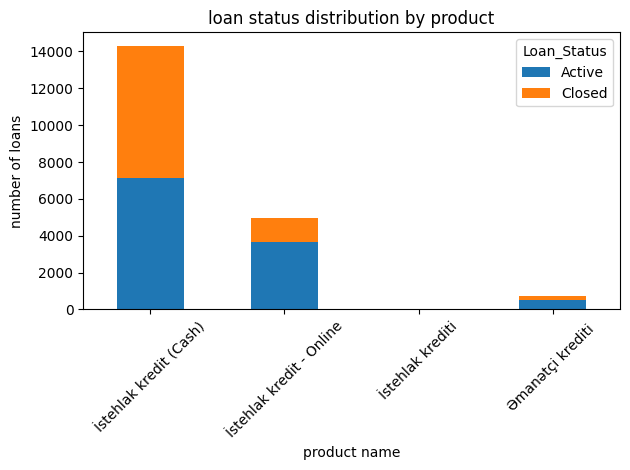

In [21]:


# pivot table for loan status by product
loan_status_by_product = pd.pivot_table(df,
                                      values='CUSTOMER_NO',
                                      index='PRODUCT_NAME',
                                      columns='Loan_Status',
                                      aggfunc='count',
                                      fill_value=0)

print("loan status distribution by product:")
print(loan_status_by_product)

# visualization
plt.figure(figsize=(12, 6))
loan_status_by_product.plot(kind='bar', stacked=True)
plt.title('loan status distribution by product')
plt.xlabel('product name')
plt.ylabel('number of loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### additional analysis - interest rate distribution by product

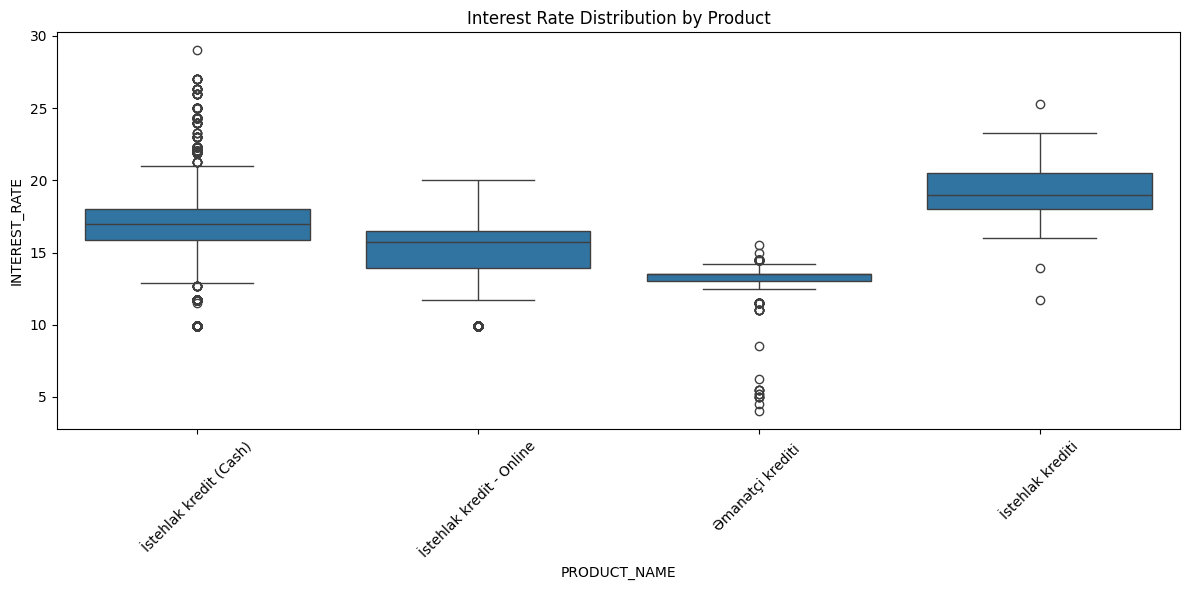


average loan amount by product:
                                  mean  count
PRODUCT_NAME                                 
İstehlak kredit (Cash)    10082.026534  14321
İstehlak kredit - Online   9457.633581   4985
İstehlak krediti          35473.255814     43
Əmanətçi krediti           8890.591724    725


In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PRODUCT_NAME', y='INTEREST_RATE')
plt.xticks(rotation=45)
plt.title('Interest Rate Distribution by Product')
plt.tight_layout()
plt.show()

# average loan amount
avg_amount_by_product = df.groupby('PRODUCT_NAME')['AMOUNT'].agg(['mean', 'count'])
print("\naverage loan amount by product:")
print(avg_amount_by_product)

### customer segmentation

### prepare for stratified sampling

In [23]:
# stratification features
eligible_customers['AGE_GROUP'] = pd.qcut(eligible_customers['AGE'], q=5, labels=['A', 'B', 'C', 'D', 'E'])
eligible_customers['AMOUNT_GROUP'] = pd.qcut(eligible_customers['AMOUNT'], q=5, labels=['1', '2', '3', '4', '5'])

# for better stratification I should combine features
eligible_customers['STRAT_GROUP'] = eligible_customers['AGE_GROUP'].astype(str) + eligible_customers['AMOUNT_GROUP'].astype(str)

# target and test groups
target_group, test_group = train_test_split(
    eligible_customers,
    test_size=0.1,
    stratify=eligible_customers['STRAT_GROUP'],
    random_state=42
)

target_group['TYPE'] = 'TARGET'
test_group['TYPE'] = 'TEST'

# combine and clean
final_df = pd.concat([target_group, test_group])
final_df = final_df.drop(['AGE_GROUP', 'AMOUNT_GROUP', 'STRAT_GROUP'], axis=1)

print("\nfinal distribution:")
print(final_df['TYPE'].value_counts(normalize=True))

# sample results
print("\nsample of segmented customers:")
print(final_df[['CUSTOMER_NO', 'AGE', 'AMOUNT', 'TYPE']].head(10))

# statistica by segment
print("\nsegment statistica:")
print(final_df.groupby('TYPE').agg({
    'AGE': ['count', 'mean'],
    'AMOUNT': ['mean', 'min', 'max'],
    'INTEREST_RATE': 'mean'
}).round(2))


final distribution:
TYPE
TARGET    0.899966
TEST      0.100034
Name: proportion, dtype: float64

sample of segmented customers:
       CUSTOMER_NO        AGE   AMOUNT    TYPE
15050       464823  55.712526   3500.0  TARGET
7396        130893  40.375086   7500.0  TARGET
10080       313617  44.202601  20000.0  TARGET
16225       706508  37.448323  25000.0  TARGET
17461       408075  55.025325   7000.0  TARGET
8563        475354  32.295688  15000.0  TARGET
1142        324450  37.727584   9500.0  TARGET
9969         35325  45.916496  19000.0  TARGET
2223        700194  44.971937   4500.0  TARGET
16196       581141  38.710472   2500.0  TARGET

segment statistica:
          AGE          AMOUNT                  INTEREST_RATE
        count   mean     mean    min       max          mean
TYPE                                                        
TARGET  10454  41.13  9413.47  300.0  200000.0         16.81
TEST     1162  41.08  9437.41  300.0   60000.0         16.93


In [24]:
final_df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,VALID_PHONE,IS_ACTIVE,LOAN_DURATION,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,TYPE
15050,464823,1969-05-02,2021-05-20,2024-05-20,2023-05-22,MX,19.9,İstehlak kredit (Cash),3500.0,0.00,GB,9947580050269,True,False,37.0,Closed,55.712526,Late Career (51-64),0.00000,TARGET
7396,130893,1984-09-02,2023-06-20,2025-06-20,2023-09-26,G,15.0,İstehlak kredit - Online,7500.0,0.00,GB,994758002737,True,False,24.0,Closed,40.375086,Mid Career (41-50),0.00000,TARGET
10080,313617,1980-11-04,2023-04-20,2025-04-20,NaT,M,12.9,İstehlak kredit (Cash),20000.0,8052.83,GB,994767006473,True,True,24.0,Active,44.202601,Mid Career (41-50),40.26415,TARGET
16225,706508,1987-08-07,2023-01-30,2025-01-30,NaT,MX,13.5,Əmanətçi krediti,25000.0,14374.87,GB,994334002953,True,True,24.0,Active,37.448323,Early Career (31-40),57.49948,TARGET
17461,408075,1970-01-08,2022-04-04,2024-10-04,2023-07-31,N,17.0,İstehlak kredit (Cash),7000.0,0.00,GB,994334003952,True,False,30.0,Closed,55.025325,Late Career (51-64),0.00000,TARGET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,113492,1982-05-29,2021-10-25,2025-10-25,2022-01-05,G,26.0,İstehlak kredit (Cash),11100.0,0.00,GB,994767004473,True,False,49.0,Closed,42.639288,Mid Career (41-50),0.00000,TEST
19669,472868,1987-02-20,2021-06-25,2024-06-25,2022-12-29,O,18.3,İstehlak kredit (Cash),19000.0,0.00,GB,NaN,False,False,37.0,Closed,37.908282,Early Career (31-40),0.00000,TEST
2442,617914,1992-11-14,2022-06-29,2025-06-29,2023-10-02,28M,16.0,İstehlak kredit - Online,10000.0,0.00,GB,994758002447,True,False,37.0,Closed,32.175222,Early Career (31-40),0.00000,TEST
3728,447003,1986-01-01,2022-07-18,2025-07-18,2022-09-27,6S,16.5,İstehlak kredit (Cash),25200.0,0.00,GB,994758003683,True,False,37.0,Closed,39.044490,Early Career (31-40),0.00000,TEST


In [25]:
final_df.groupby('TYPE')['AGE'].describe()


,count,mean,std,min,25%,50%,75%,max
TYPE,,,,,,,,
TARGET,10454.0,41.125282,10.127058,25.002053,33.067762,38.933607,48.038330,64.000000
TEST,1162.0,41.078805,10.079875,25.045859,32.923340,38.913073,48.054757,63.969884


In [26]:
final_df.groupby('TYPE')['AMOUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
TYPE,,,,,,,,
TARGET,10454.0,9413.466176,8649.775472,300.0,4000.0,6900.0,12000.0,200000.0
TEST,1162.0,9437.412220,8331.176215,300.0,3725.0,7000.0,12000.0,60000.0


In [27]:
pd.crosstab(final_df['TYPE'], final_df['PRODUCT_NAME'], normalize='index')

PRODUCT_NAME,İstehlak kredit (Cash),İstehlak kredit - Online,İstehlak krediti,Əmanətçi krediti
TYPE,,,,
TARGET,0.814616,0.155826,0.002296,0.027262
TEST,0.826162,0.146299,0.002582,0.024957


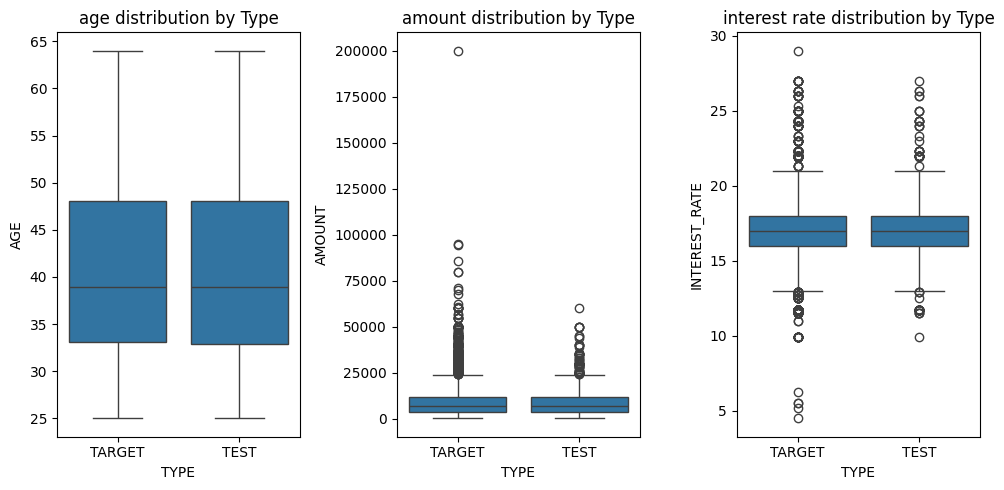

In [28]:
plt.figure(figsize=(10, 5))

# age 
plt.subplot(1, 3, 1)
sns.boxplot(data=final_df, x='TYPE', y='AGE')
plt.title('age distribution by Type')

# amount 
plt.subplot(1, 3, 2)
sns.boxplot(data=final_df, x='TYPE', y='AMOUNT')
plt.title('amount distribution by Type')

# interest rate 
plt.subplot(1, 3, 3)
sns.boxplot(data=final_df, x='TYPE', y='INTEREST_RATE')
plt.title('interest rate distribution by Type')

plt.tight_layout()
plt.show()

# Task 2

In [29]:
# from pandasql import sqldf

# customer_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='CUSTOMER')
# credit_contracts_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='CREDIT_CONTRACTS')
# product_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='PRODUCT')
# transaction_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='TRANSACTION')

# monthly_income = customer_df[['CIF', 'AVERAGE_SALARY', 'AVERAGE_PENSION']].copy()
# monthly_income['MONTHLY_INCOME'] = monthly_income[['AVERAGE_SALARY', 'AVERAGE_PENSION']].fillna(0).max(axis=1)
# result = monthly_income[['CIF', 'MONTHLY_INCOME']]


# def sql_query(query):
#     return sqldf(query, globals())

# query = """
# SELECT 
#     CIF,
#     AVERAGE_SALARY + AVERAGE_PENSION as MONTHLY_INCOME
# FROM customer_df
# """

# result = sql_query(query)
# result

In [30]:
import duckdb

excel_file = 'DATA_ANALYTICS_EXAM_SQL.XLSX'
customer = pd.read_excel(excel_file, sheet_name='CUSTOMER')
credit_contracts = pd.read_excel(excel_file, sheet_name='CREDIT_CONTRACTS')
product = pd.read_excel(excel_file, sheet_name='PRODUCT')
transaction = pd.read_excel(excel_file, sheet_name='TRANSACTION')

con = duckdb.connect()
con.register('customer', customer)
con.register('credit_contracts', credit_contracts)
con.register('product', product)
con.register('transaction', transaction)

In [31]:
# Pension Customers with Active GTKR Products
# This query finds all pensioners who have an active GTKR product. It:

# Joins customer and credit_contracts tables using customer ID (cif)
# Filters for pension income customers
# Filters for GTKR products that are active

query1 = """
select *  from customer c 
 inner join credit_contracts cc
    on c.cif = cc.cif
 where c.income_type = 'Pension'
   and cc.product_code = 'GTKR'
   and cc.status = 'ACTIVE';
"""
result1 = con.execute(query1).df()
print("Query 1 Result:")
result1.head()

Query 1 Result:


,CIF,BIRTH_DATE,GENDER,REGISTERED_CITY_REGION,INCOME_TYPE,AVERAGE_SALARY,AVERAGE_PENSION,CIF_1,CONTRACT_NUMBER,PRODUCT_CODE,STATUS,AMOUNT/LIMIT,INTEREST,DURATION,OPEN_DATE,CLOSE_DATE,ACCOUNT_NUMBER
0,1000094,1986-04-02,Male,ZAQATALA,Pension,0,346,1000094,GTKR0002,GTKR,ACTIVE,1400,27,36,2020-08-14,2023-08-14,NaN
1,1000041,1961-02-02,Female,ASTARA,Pension,0,368,1000041,GTKR0004,GTKR,ACTIVE,8100,28,48,2020-09-21,2024-09-20,NaN
2,1000052,1989-04-15,Male,CEBRAYIL,Pension,0,155,1000052,GTKR0005,GTKR,ACTIVE,9900,21,12,2021-02-23,2022-02-23,NaN
3,1000001,1962-09-09,Male,GEDEBEY,Pension,0,257,1000001,GTKR0008,GTKR,ACTIVE,3700,21,12,2023-09-21,2024-09-20,NaN
4,1000001,1962-09-09,Male,GEDEBEY,Pension,0,257,1000001,GTKR0013,GTKR,ACTIVE,5600,26,24,2022-09-13,2024-09-12,NaN


In [32]:
# Account Number Pattern Search

# This query finds accounts that:

# Have BRED or BBLK products
# Have both 9 and 1 in their account number
# But 9 and 1 cannot be adjacent (no "91" or "19")

query2 = """
SELECT * 
FROM credit_contracts cc
WHERE product_code IN ('BRED', 'BBLK')
    AND CAST(cc.account_number AS VARCHAR) LIKE '%9%'
    AND CAST(cc.account_number AS VARCHAR) LIKE '%1%'
    AND CAST(cc.account_number AS VARCHAR) NOT LIKE '%91%'
    AND CAST(cc.account_number AS VARCHAR) NOT LIKE '%19%';
"""
result2 = con.execute(query2).df()
print("Query 2 Result:")
result2.head()

Query 2 Result:


,CIF,CONTRACT_NUMBER,PRODUCT_CODE,STATUS,AMOUNT/LIMIT,INTEREST,DURATION,OPEN_DATE,CLOSE_DATE,ACCOUNT_NUMBER
0,1000018,BRED0002,BRED,ACTIVE,2300,25,36,2019-11-29,2022-11-28,3.881791e+09
1,1000084,BRED0004,BRED,ACTIVE,3900,25,36,2020-08-02,2023-08-02,3.881791e+09
2,1000012,BRED0005,BRED,ACTIVE,3700,25,36,2019-12-29,2022-12-28,3.881791e+09
3,1000089,BRED0010,BRED,ACTIVE,3700,25,36,2021-07-01,2024-06-30,3.881790e+09
4,1000093,BBLK0003,BBLK,ACTIVE,5500,25,36,2020-07-21,2023-07-21,3.881791e+09


In [33]:
# POS Transactions by Region
# Counts POS transactions by region
# Only for BRED and BBLK products
# Groups results by customer's registered city/region
 
query3 = """
select c.registered_city_region, count(*)
  from customer c
 inner join credit_contracts cc
    on c.cif = cc.cif
 inner join transaction t
    on cc.account_number = t.account_number
 where cc.product_code in ('BRED', 'BBLK')
   and t.transaction_type = 'POS'
 group by c.registered_city_region;
"""
result3 = con.execute(query3).df()
print("Query 3 Result:")
result3.head()

Query 3 Result:


,REGISTERED_CITY_REGION,count_star()
0,BARDA,3
1,KURDAMIR,1
2,KHACHMAZ,3
3,SIYAZAN,3
4,AGCABEDI,2


In [34]:
# First Credit Contract

# The earliest credit contract for each customer
# Returns the open date, customer ID
# And the contract number for that first contract
# The earliest credit contract for each customer with their first contract number

query4 = """
WITH FirstContracts AS (
    SELECT 
        cif,
        open_date,
        contract_number,
        ROW_NUMBER() OVER (PARTITION BY cif ORDER BY open_date) as rn
    FROM credit_contracts
)
SELECT 
    open_date as first_loan_date,
    cif,
    contract_number as muqavile_nomresi
FROM FirstContracts
WHERE rn = 1
ORDER BY cif;
"""
result4 = con.execute(query4).df()
print("Query 4 Result:")
result4.head()

Query 4 Result:


,first_loan_date,CIF,muqavile_nomresi
0,2021-04-22,1000001,GTKR0039
1,2023-02-09,1000002,GTKR0064
2,2013-01-25,1000003,BBLK0039
3,2019-02-23,1000005,BBLK0040
4,2017-06-23,1000006,GTKR0038


In [35]:
# Top 3 Customers by Transaction Amount per Income Type
# Uses a CTE (Common Table Expression) to rank customers
# Groups by income type and sums transaction amounts
# Uses ROW_NUMBER() to rank customers within each income type
# Returns the top 3 customers by transaction amount for each income type

query5 = """
WITH FirstLoans AS (
    SELECT 
        cif,
        open_date,
        contract_number,
        ROW_NUMBER() OVER (PARTITION BY cif ORDER BY open_date) as rn
    FROM credit_contracts
)
SELECT 
    fl.open_date as first_loan_date,
    fl.cif,
    fl.contract_number as muqavile_nomresi
FROM FirstLoans fl
WHERE rn = 1;
"""
result5 = con.execute(query5).df()
print("Query 5 Result:")
result5.head()

Query 5 Result:


,first_loan_date,CIF,muqavile_nomresi
0,2019-04-08,1000018,BRED0003
1,2020-06-25,1000020,GTKR0023
2,2018-01-29,1000037,BBLK0007
3,2022-06-28,1000060,GTKR0035
4,2013-01-25,1000003,BBLK0039


In [36]:
# CIF and monthly income
query6 = """
SELECT 
    CIF,
    AVERAGE_SALARY + AVERAGE_PENSION as MONTHLY_INCOME
FROM customer
"""
result6 = con.execute(query6).df()
print("Query 6 Result:")
result6.head()

Query 6 Result:


,CIF,MONTHLY_INCOME
0,1000001,257
1,1000002,1033
2,1000003,488
3,1000004,1860
4,1000005,1654


In [37]:
# Average product duration
query7 = """
SELECT 
    p.PRODUCT_NAME,
    AVG(DATEDIFF('month', cc.OPEN_DATE, cc.CLOSE_DATE)) as AVG_MONTHS
FROM product p
JOIN credit_contracts cc ON p.PRODUCT_CODE = cc.PRODUCT_CODE
WHERE cc.CLOSE_DATE IS NOT NULL
GROUP BY p.PRODUCT_NAME
"""
result7 = con.execute(query7).df()
print("Query 7 Result:")
result7

Query 7 Result:


,PRODUCT_NAME,AVG_MONTHS
0,Visa Red,35.900000
1,Visa Black,36.000000
2,Gündəlik Tələbat,28.957143


In [38]:
# Customers with 2+ products by region
query8 = """
WITH CustomerProducts AS (
    SELECT 
        c.CIF,
        c.REGISTERED_CITY_REGION,
        COUNT(DISTINCT cc.PRODUCT_CODE) as PRODUCT_COUNT
    FROM customer c
    JOIN credit_contracts cc ON c.CIF = cc.CIF
    WHERE cc.STATUS = 'ACTIVE'
    GROUP BY c.CIF, c.REGISTERED_CITY_REGION
    HAVING COUNT(DISTINCT cc.PRODUCT_CODE) >= 2
)
SELECT 
    REGISTERED_CITY_REGION,
    COUNT(*) as CUSTOMER_COUNT
FROM CustomerProducts
GROUP BY REGISTERED_CITY_REGION
"""
result8 = con.execute(query8).df()
print("Query 8 Result:")
result8

Query 8 Result:


,REGISTERED_CITY_REGION,CUSTOMER_COUNT
0,GAKH,1
1,BAKU,5
2,GOBUSTAN,1
3,AGJABADI,2
4,CALILABAD,1
5,KHACHMAZ,1
6,SIYAZAN,1
7,BEYLAQAN,1
8,ZAQATALA,1


In [39]:
# Last transaction by customer
query9 = """
WITH RankedTransactions AS (
    SELECT 
        c.CIF,
        t.TRANSACTION_TYPE,
        t.AMOUNT,
        t.DATE,
        ROW_NUMBER() OVER (PARTITION BY c.CIF ORDER BY t.DATE DESC) as rn
    FROM customer c
    JOIN credit_contracts cc ON c.CIF = cc.CIF
    JOIN transaction t ON cc.ACCOUNT_NUMBER = t.ACCOUNT_NUMBER
)
SELECT 
    CIF,
    TRANSACTION_TYPE,
    AMOUNT,
    DATE
FROM RankedTransactions
WHERE rn = 1
"""
result9 = con.execute(query9).df()
print("Query 9 Result:")
result9.head()

Query 9 Result:


,CIF,TRANSACTION_TYPE,AMOUNT,DATE
0,1000024,POS,607,2021-09-07
1,1000084,Online,91,2021-09-05
2,1000018,Cash,228,2021-07-25
3,1000012,Cash,594,2021-09-12
4,1000062,Cash,119,2021-09-15


In [40]:
# Birkart customers with transactions but no installments
query10 = """
SELECT DISTINCT 
    c.CIF,
    c.INCOME_TYPE,
    c.REGISTERED_CITY_REGION
FROM customer c
INNER JOIN credit_contracts cc ON c.CIF = cc.CIF
INNER JOIN transaction t ON cc.ACCOUNT_NUMBER = t.ACCOUNT_NUMBER
WHERE cc.PRODUCT_CODE in ('BRED','BBLK') 
AND NOT EXISTS (
    SELECT 1
    FROM customer c2
    INNER JOIN credit_contracts cc2 ON c2.CIF = cc2.CIF
    INNER JOIN transaction t2 ON cc2.ACCOUNT_NUMBER = t2.ACCOUNT_NUMBER
    WHERE t2.TRANSACTION_TYPE = 'Taksit'
    AND c2.CIF = c.CIF
)
"""
result10 = con.execute(query10).df()
print("Query 10 Result:")
result10

Query 10 Result:


,CIF,INCOME_TYPE,REGISTERED_CITY_REGION
0,1000013,Pension,AGJABADI
1,1000008,Pension,BAKU
2,1000073,Salary,GEDEBEY


In [41]:
con.close()

# Task 3

### Behavioral Segmentation 

In [42]:
def get_loan_frequency(customer_loans):
    if customer_loans == 1:
        return 'One-time'
    elif customer_loans <= 3:
        return 'Occasional'
    else:
        return 'Frequent'

loan_frequency = df.groupby('CUSTOMER_NO').size().reset_index()
loan_frequency.columns = ['CUSTOMER_NO', 'loan_count']
loan_frequency['behavior_segment'] = loan_frequency['loan_count'].apply(get_loan_frequency)

df = df.merge(loan_frequency[['CUSTOMER_NO', 'behavior_segment']], on='CUSTOMER_NO', how='left')

behavioral_analysis = df.groupby('behavior_segment').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': ['mean', 'median'],
    'LOAN_DURATION': 'mean',
    'INTEREST_RATE': 'mean'
}).round(2)
behavioral_analysis

CUSTOMER_NO    AMOUNT         LOAN_DURATION INTEREST_RATE
                       count      mean  median          mean          mean
behavior_segment                                                          
Frequent                 379  10649.00  6000.0         27.45         15.64
Occasional              4933  11537.86  8500.0         32.86         16.50
One-time               14762   9385.57  7000.0         31.95         16.15

### Value-Based Segmentation

In [43]:
def get_value_segment(amount):
    if amount < df['AMOUNT'].quantile(0.25):
        return 'Low Value'
    elif amount < df['AMOUNT'].quantile(0.75):
        return 'Medium Value'
    else:
        return 'High Value'

df['value_segment'] = df['AMOUNT'].apply(get_value_segment)

value_age_analysis = pd.crosstab([df['AGE_SEGMENT']], df['value_segment'], normalize='index') * 100

value_age_analysis.round(2)

value_segment,High Value,Low Value,Medium Value
AGE_SEGMENT,,,
Early Career (31-40),26.36,23.11,50.52
Late Career (51-64),24.22,20.68,55.10
Mid Career (41-50),31.75,20.61,47.64
Senior (65+),16.50,31.80,51.70
Young (<25),8.16,51.06,40.78
Young Professional (25-30),15.04,33.88,51.08


### Risk-Based Segmentation

In [44]:
df['risk_score'] = (
    (df['REMAIN_PERCENTAGE'] / 100 * 0.4) +
    (df['INTEREST_RATE'] / df['INTEREST_RATE'].max() * 0.3) +
    (df['LOAN_DURATION'] / df['LOAN_DURATION'].max() * 0.3)
)

def get_risk_segment(score):
    if score < 0.3:
        return 'Low Risk'
    elif score < 0.6:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['risk_segment'] = df['risk_score'].apply(get_risk_segment)
df.tail()


,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,LOAN_RANGE,Year,Month,behavior_segment,value_segment,risk_score,risk_segment
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,54.617385,Late Career (51-64),0.000000,Large (>10K AZN),2021,12,One-time,High Value,0.326713,Medium Risk
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,36.985626,Early Career (31-40),94.092941,Large (>10K AZN),2023,9,Occasional,High Value,0.660671,High Risk
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,26.997947,Young Professional (25-30),96.785800,Medium (5K-10K AZN),2023,12,One-time,Medium Value,0.611731,High Risk
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,65.568789,Senior (65+),54.034000,Small (<5K AZN),2023,8,One-time,Low Value,0.397563,Medium Risk
20073,522302,1989-10-29,2022-02-23,2025-02-23,NaT,O,17.0,İstehlak kredit (Cash),7800.0,3341.76,...,35.219713,Early Career (31-40),42.843077,Medium (5K-10K AZN),2022,2,One-time,Medium Value,0.487741,Medium Risk


### Product Preference Segmentation

In [45]:
product_preferences = df.groupby(['AGE_SEGMENT', 'PRODUCT_NAME']).agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': 'mean',
    'LOAN_DURATION': 'mean'
}).round(2)

product_preferences

CUSTOMER_NO    AMOUNT  \
AGE_SEGMENT                PRODUCT_NAME                                      
Early Career (31-40)       İstehlak kredit (Cash)           5668  10071.20   
                           İstehlak kredit - Online         2208   9661.31   
                           İstehlak krediti                   14  36160.71   
                           Əmanətçi krediti                  235  10146.69   
Late Career (51-64)        İstehlak kredit (Cash)           3226   9976.86   
                           İstehlak kredit - Online          726  10049.83   
                           İstehlak krediti                    9  23522.22   
                           Əmanətçi krediti                  155   7777.88   
Mid Career (41-50)         İstehlak kredit (Cash)           3344  11802.30   
                           İstehlak kredit - Online         1118  11020.88   
                           İstehlak krediti                   16  40875.00   
                           Əmanətçi krediti                  155   9352.45   
Senior (65+)               İstehlak kredit (Cash)            311   7884.29   
                           İstehlak kredit - Online           16   5028.75   
                           İstehlak krediti                    1  35000.00   
                           Əmanətçi krediti                   84  11074.57   
Young (<25)                İstehlak kredit (Cash)            134   5836.12   
                           İstehlak kredit - Online          121   5287.77   
                           İstehlak krediti                    1   1400.00   
                           Əmanətçi krediti                   26   3527.69   
Young Professional (25-30) İstehlak kredit (Cash)           1638   7579.26   
                           İstehlak kredit - Online          796   6879.82   
                           İstehlak krediti                    2  58500.00   
                           Əmanətçi krediti                   70   5486.03   

                                                     LOAN_DURATION  
AGE_SEGMENT                PRODUCT_NAME                             
Early Career (31-40)       İstehlak kredit (Cash)            34.18  
                           İstehlak kredit - Online          29.68  
                           İstehlak krediti                  50.21  
                           Əmanətçi krediti                  15.45  
Late Career (51-64)        İstehlak kredit (Cash)            34.09  
                           İstehlak kredit - Online          29.84  
                           İstehlak krediti                  47.00  
                           Əmanətçi krediti                  16.43  
Mid Career (41-50)         İstehlak kredit (Cash)            34.54  
                           İstehlak kredit - Online          30.11  
                           İstehlak krediti                  53.12  
                           Əmanətçi krediti                  15.26  
Senior (65+)               İstehlak kredit (Cash)            28.44  
                           İstehlak kredit - Online          23.12  
                           İstehlak krediti                  49.00  
                           Əmanətçi krediti                  16.18  
Young (<25)                İstehlak kredit (Cash)            29.14  
                           İstehlak kredit - Online          24.61  
                           İstehlak krediti                  12.00  
                           Əmanətçi krediti                  10.27  
Young Professional (25-30) İstehlak kredit (Cash)            32.09  
                           İstehlak kredit - Online          27.83  
                           İstehlak krediti                  58.00  
                           Əmanətçi krediti                  14.31

### Combination Segmentation

In [46]:
df['composite_segment'] = df.apply(lambda x: f"{x['AGE_SEGMENT']}_{x['value_segment']}_{x['risk_segment']}", axis=1)

composite_analysis = df.groupby('composite_segment').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': 'mean',
    'LOAN_DURATION': 'mean',
    'INTEREST_RATE': 'mean'
}).round(2)

significant_segments = composite_analysis[composite_analysis['CUSTOMER_NO'] >= 100]
significant_segments

,CUSTOMER_NO,AMOUNT,LOAN_DURATION,INTEREST_RATE
composite_segment,,,,
Early Career (31-40)_High Value_High Risk,802,22845.52,41.37,15.68
Early Career (31-40)_High Value_Low Risk,197,23553.55,27.24,14.81
Early Career (31-40)_High Value_Medium Risk,1143,20440.56,36.67,16.77
Early Career (31-40)_Low Value_High Risk,240,2646.27,32.17,16.17
Early Career (31-40)_Low Value_Low Risk,559,2146.57,18.99,14.69
Early Career (31-40)_Low Value_Medium Risk,1079,2350.43,25.22,15.64
Early Career (31-40)_Medium Value_High Risk,1095,7892.32,37.39,16.17
Early Career (31-40)_Medium Value_Low Risk,528,6683.95,22.93,15.28
Early Career (31-40)_Medium Value_Medium Risk,2482,7428.84,34.06,17.17


### Duration-Based Segmentation

In [47]:
def get_duration_segment(duration):
    if duration <= 12:
        return 'Short Term'
    elif duration <= 24:
        return 'Medium Term'
    else:
        return 'Long Term'

df['duration_segment'] = df['LOAN_DURATION'].apply(get_duration_segment)

duration_analysis = df.groupby(['duration_segment', 'AGE_SEGMENT']).agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': ['mean', 'median'],
    'INTEREST_RATE': 'mean'
}).round(2)

duration_analysis

CUSTOMER_NO    AMOUNT           \
                                                  count      mean   median   
duration_segment AGE_SEGMENT                                                 
Long Term        Early Career (31-40)              5486  11834.82   9800.0   
                 Late Career (51-64)               2806  11533.55   9200.0   
                 Mid Career (41-50)                3177  13694.57  10000.0   
                 Senior (65+)                       179  10084.25   8000.0   
                 Young (<25)                        105   8440.19   7000.0   
                 Young Professional (25-30)        1416   9445.30   7825.0   
Medium Term      Early Career (31-40)              1892   7062.67   5000.0   
                 Late Career (51-64)                965   7371.98   5000.0   
                 Mid Career (41-50)                1053   8107.77   5000.0   
                 Senior (65+)                       152   9218.63   5200.0   
                 Young (<25)                         93   4664.84   3100.0   
                 Young Professional (25-30)         754   5397.45   4000.0   
Short Term       Early Career (31-40)               747   4040.24   2100.0   
                 Late Career (51-64)                345   4120.92   2500.0   
                 Mid Career (41-50)                 403   4582.39   2250.0   
                 Senior (65+)                        81   3597.86   2000.0   
                 Young (<25)                         84   2320.60   1500.0   
                 Young Professional (25-30)         336   2821.31   2000.0   

                                            INTEREST_RATE  
                                                     mean  
duration_segment AGE_SEGMENT                               
Long Term        Early Career (31-40)               17.17  
                 Late Career (51-64)                17.42  
                 Mid Career (41-50)                 17.16  
                 Senior (65+)                       17.89  
                 Young (<25)                        16.64  
                 Young Professional (25-30)         17.04  
Medium Term      Early Career (31-40)               15.26  
                 Late Career (51-64)                15.33  
                 Mid Career (41-50)                 15.22  
                 Senior (65+)                       15.43  
                 Young (<25)                        15.34  
                 Young Professional (25-30)         15.45  
Short Term       Early Career (31-40)               12.01  
                 Late Career (51-64)                12.06  
                 Mid Career (41-50)                 12.05  
                 Senior (65+)                       12.26  
                 Young (<25)                        12.21  
                 Young Professional (25-30)         11.84

### Customer Lifecycle Value Segmentation

In [48]:
df['years_until_65'] = 65 - df['AGE']

df['potential_future_loans'] = (df['years_until_65'] / 3).clip(0)  # assuming avg 3 years between loans
df['lifetime_value_potential'] = df['AMOUNT'] * (1 + df['potential_future_loans'] * 0.7)  # 0.7 probability factor

def get_ltv_segment(value):
    if value < df['lifetime_value_potential'].quantile(0.33):
        return 'Developing Value'
    elif value < df['lifetime_value_potential'].quantile(0.66):
        return 'Growing Value'
    else:
        return 'High Potential Value'

df['ltv_segment'] = df['lifetime_value_potential'].apply(get_ltv_segment)

ltv_analysis = df.groupby('ltv_segment').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': 'mean',
    'lifetime_value_potential': 'mean',
    'years_until_65': 'mean'
}).round(2)
ltv_analysis

,CUSTOMER_NO,AMOUNT,lifetime_value_potential,years_until_65
ltv_segment,,,,
Developing Value,6625,3883.77,14895.83,17.83
Growing Value,6624,7429.03,44006.58,25.39
High Potential Value,6825,18250.87,129869.17,27.93


### Digital Engagement Segmentation (based on loan channel)

In [49]:
def get_channel_preference(product):
    if 'Online' in product:
        return 'Digital Native'
    elif 'Cash' in product:
        return 'Traditional'
    else:
        return 'Mixed'

df['channel_segment'] = df['PRODUCT_NAME'].apply(get_channel_preference)

digital_analysis = pd.crosstab([df['AGE_SEGMENT']], df['channel_segment'], normalize='index') * 100
digital_analysis

channel_segment,Digital Native,Mixed,Traditional
AGE_SEGMENT,,,
Early Career (31-40),27.175385,3.064615,69.760000
Late Career (51-64),17.638484,3.984451,78.377065
Mid Career (41-50),24.131232,3.690913,72.177855
Senior (65+),3.883495,20.631068,75.485437
Young (<25),42.907801,9.574468,47.517730
Young Professional (25-30),31.763767,2.873105,65.363128


### Financial Sophistication Segmentation

In [50]:
df['sophistication_score'] = (
    (df['AMOUNT'] / df['AMOUNT'].max() * 0.3) + 
    (df['LOAN_DURATION'] / df['LOAN_DURATION'].max() * 0.2) +   
    ((df['REMAIN_AMOUNT'] == 0).astype(int) * 0.3) +  
    (df['AGE'] / df['AGE'].max() * 0.2)  
)

def get_sophistication_segment(score):
    if score < 0.4:
        return 'Emerging Financial User'
    elif score < 0.7:
        return 'Established Financial User'
    else:
        return 'Sophisticated Financial User'

df['sophistication_segment'] = df['sophistication_score'].apply(get_sophistication_segment)
df.tail()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,risk_segment,composite_segment,duration_segment,years_until_65,potential_future_loans,lifetime_value_potential,ltv_segment,channel_segment,sophistication_score,sophistication_segment
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,Medium Risk,Late Career (51-64)_High Value_Medium Risk,Long Term,10.382615,3.460872,48601.063199,Growing Value,Traditional,0.541643,Established Financial User
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,High Risk,Early Career (31-40)_High Value_High Risk,Long Term,28.014374,9.338125,128123.682409,High Potential Value,Digital Native,0.204950,Emerging Financial User
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,High Risk,Young Professional (25-30)_Medium Value_High Risk,Medium Term,38.002053,12.667351,98671.457906,High Potential Value,Digital Native,0.138375,Emerging Financial User
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,Medium Risk,Senior (65+)_Low Value_Medium Risk,Short Term,-0.568789,0.000000,1500.000000,Developing Value,Mixed,0.182170,Emerging Financial User
20073,522302,1989-10-29,2022-02-23,2025-02-23,NaT,O,17.0,İstehlak kredit (Cash),7800.0,3341.76,...,Medium Risk,Early Career (31-40)_Medium Value_Medium Risk,Long Term,29.780287,9.926762,62000.123203,Growing Value,Traditional,0.187055,Emerging Financial User


### Product Upgrade Potential Segmentation

In [51]:
df['payment_capacity'] = (df['AMOUNT'] / (df['LOAN_DURATION'] * df['INTEREST_RATE'])) * 100
df['successful_closure'] = df['CLOSE_DATE'].notna() & (df['REMAIN_AMOUNT'] == 0)

def get_upgrade_potential(row):
    if row['successful_closure'] and row['payment_capacity'] > df['payment_capacity'].median():
        return 'High Upgrade Potential'
    elif row['successful_closure']:
        return 'Moderate Upgrade Potential'
    else:
        return 'Basic Customer'

df['upgrade_segment'] = df.apply(get_upgrade_potential, axis=1)
df.tail()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,years_until_65,potential_future_loans,lifetime_value_potential,ltv_segment,channel_segment,sophistication_score,sophistication_segment,payment_capacity,successful_closure,upgrade_segment
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,10.382615,3.460872,48601.063199,Growing Value,Traditional,0.541643,Established Financial User,2132.132132,True,High Upgrade Potential
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,28.014374,9.338125,128123.682409,High Potential Value,Digital Native,0.204950,Emerging Financial User,3305.463737,False,Basic Customer
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,38.002053,12.667351,98671.457906,High Potential Value,Digital Native,0.138375,Emerging Financial User,3229.974160,False,Basic Customer
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,-0.568789,0.000000,1500.000000,Developing Value,Mixed,0.182170,Emerging Financial User,1010.101010,False,Basic Customer
20073,522302,1989-10-29,2022-02-23,2025-02-23,NaT,O,17.0,İstehlak kredit (Cash),7800.0,3341.76,...,29.780287,9.926762,62000.123203,Growing Value,Traditional,0.187055,Emerging Financial User,1240.063593,False,Basic Customer


### Financial Goal-Based Segmentation

In [52]:
def infer_financial_goal(row):
    amount = row['AMOUNT']
    duration = row['LOAN_DURATION']
    age = row['AGE']
    
    if amount > 50000:
        return 'Major Investment'
    elif amount > 20000 and duration > 36:
        return 'Asset Building'
    elif amount < 5000 and duration < 12:
        return 'Short-term Needs'
    elif age < 30 and amount < 15000:
        return 'Career Establishment'
    else:
        return 'Lifestyle Enhancement'

df['financial_goal_segment'] = df.apply(infer_financial_goal, axis=1)
df.tail()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,potential_future_loans,lifetime_value_potential,ltv_segment,channel_segment,sophistication_score,sophistication_segment,payment_capacity,successful_closure,upgrade_segment,financial_goal_segment
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,3.460872,48601.063199,Growing Value,Traditional,0.541643,Established Financial User,2132.132132,True,High Upgrade Potential,Lifestyle Enhancement
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,9.338125,128123.682409,High Potential Value,Digital Native,0.204950,Emerging Financial User,3305.463737,False,Basic Customer,Lifestyle Enhancement
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,12.667351,98671.457906,High Potential Value,Digital Native,0.138375,Emerging Financial User,3229.974160,False,Basic Customer,Career Establishment
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,0.000000,1500.000000,Developing Value,Mixed,0.182170,Emerging Financial User,1010.101010,False,Basic Customer,Short-term Needs
20073,522302,1989-10-29,2022-02-23,2025-02-23,NaT,O,17.0,İstehlak kredit (Cash),7800.0,3341.76,...,9.926762,62000.123203,Growing Value,Traditional,0.187055,Emerging Financial User,1240.063593,False,Basic Customer,Lifestyle Enhancement


### Cross-Sell Opportunity Segmentation

In [53]:
df['cross_sell_score'] = (
    (df['AGE'] / df['AGE'].max() * 0.2) +  # age factor
    (df['AMOUNT'] / df['AMOUNT'].max() * 0.3) +  # financial capacity
    ((df['REMAIN_AMOUNT'] == 0).astype(int) * 0.3) +  # good payment history
    (df['LOAN_DURATION'] / df['LOAN_DURATION'].max() * 0.2)  # relationship duration
)

def get_cross_sell_segment(score):
    if score < 0.3:
        return 'Basic Banking Products'
    elif score < 0.6:
        return 'Investment Products Potential'
    else:
        return 'Premium Services Candidate'

df['cross_sell_segment'] = df['cross_sell_score'].apply(get_cross_sell_segment)
df.tail()

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,ltv_segment,channel_segment,sophistication_score,sophistication_segment,payment_capacity,successful_closure,upgrade_segment,financial_goal_segment,cross_sell_score,cross_sell_segment
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,Growing Value,Traditional,0.541643,Established Financial User,2132.132132,True,High Upgrade Potential,Lifestyle Enhancement,0.541643,Investment Products Potential
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,High Potential Value,Digital Native,0.204950,Emerging Financial User,3305.463737,False,Basic Customer,Lifestyle Enhancement,0.204950,Basic Banking Products
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,High Potential Value,Digital Native,0.138375,Emerging Financial User,3229.974160,False,Basic Customer,Career Establishment,0.138375,Basic Banking Products
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,Developing Value,Mixed,0.182170,Emerging Financial User,1010.101010,False,Basic Customer,Short-term Needs,0.182170,Basic Banking Products
20073,522302,1989-10-29,2022-02-23,2025-02-23,NaT,O,17.0,İstehlak kredit (Cash),7800.0,3341.76,...,Growing Value,Traditional,0.187055,Emerging Financial User,1240.063593,False,Basic Customer,Lifestyle Enhancement,0.187055,Basic Banking Products


### Age Segmentation

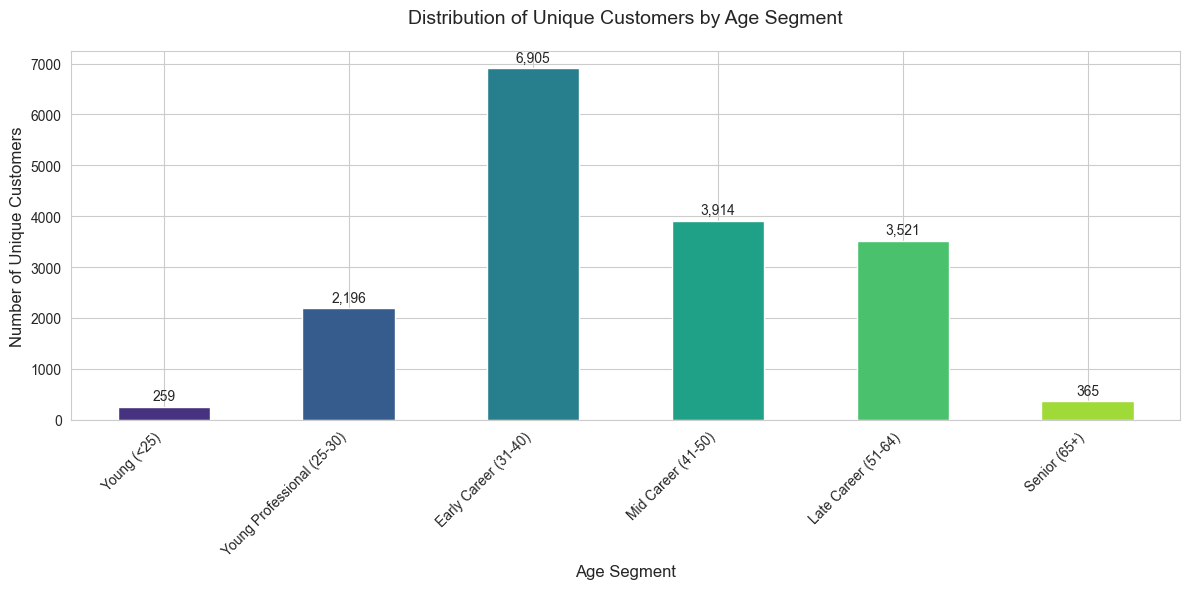


Unique Customers by Age Segment:
--------------------------------------------------
Young (<25): 259 customers (1.5%)
Young Professional (25-30): 2,196 customers (12.8%)
Early Career (31-40): 6,905 customers (40.2%)
Mid Career (41-50): 3,914 customers (22.8%)
Late Career (51-64): 3,521 customers (20.5%)
Senior (65+): 365 customers (2.1%)

Total Unique Customers: 17,160


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('loan_data.xlsx')

# Convert dates to datetime
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate age and create segments
df['AGE'] = (pd.Timestamp.now() - df['BIRTH_DATE']).dt.days / 365.25

def get_age_segment(age):
    if age < 25:
        return 'Young (<25)'
    elif age <= 30:
        return 'Young Professional (25-30)'
    elif age <= 40:
        return 'Early Career (31-40)'
    elif age <= 50:
        return 'Mid Career (41-50)'
    elif age <= 64:
        return 'Late Career (51-64)'
    else:
        return 'Senior (65+)'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)

# Count unique customers in each segment
segment_distribution = df.groupby('AGE_SEGMENT')['CUSTOMER_NO'].nunique()

# Sort segments in logical order
segment_order = [
    'Young (<25)',
    'Young Professional (25-30)',
    'Early Career (31-40)',
    'Mid Career (41-50)',
    'Late Career (51-64)',
    'Senior (65+)'
]
segment_distribution = segment_distribution.reindex(segment_order)

# Create the visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(segment_distribution))

# Create bar plot
ax = segment_distribution.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Distribution of Unique Customers by Age Segment', fontsize=14, pad=20)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Number of Unique Customers', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(segment_distribution):
    ax.text(i, v + (segment_distribution.max() * 0.01), # Add small offset for better visibility
            f'{v:,}', 
            ha='center', 
            va='bottom',
            fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print detailed statistics
print("\nUnique Customers by Age Segment:")
print("-" * 50)
for segment in segment_order:
    count = segment_distribution[segment]
    percentage = (count / segment_distribution.sum()) * 100
    print(f"{segment}: {count:,} customers ({percentage:.1f}%)")

# Print total unique customers
print(f"\nTotal Unique Customers: {segment_distribution.sum():,}")

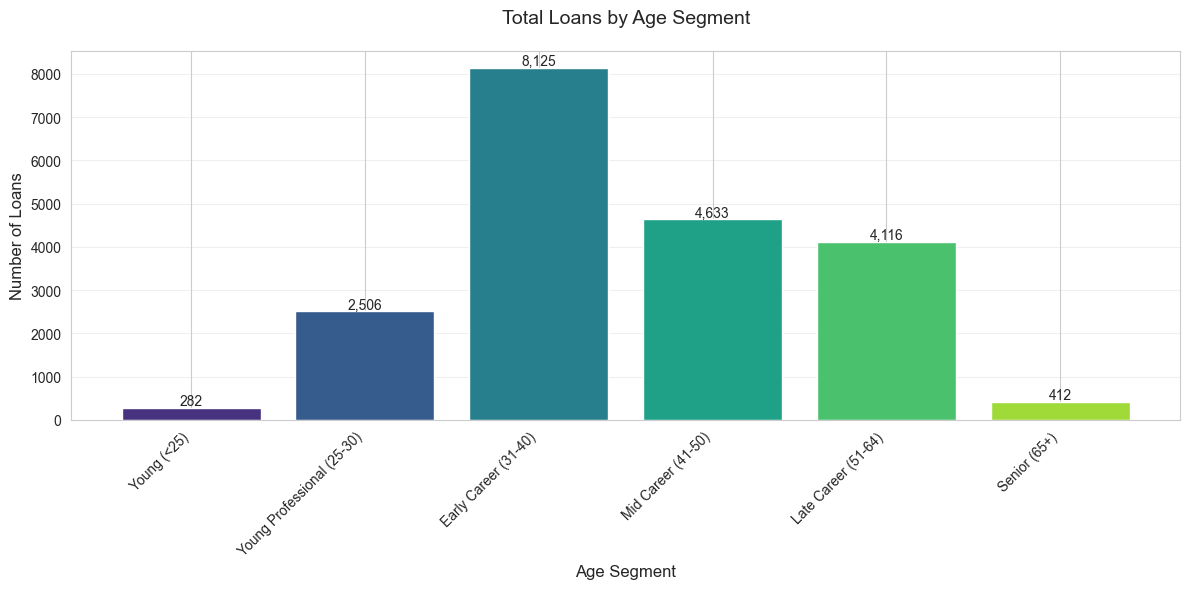


Total Loans by Age Segment:
--------------------------------------------------
Young (<25)                    282 (   1.4%)
Young Professional (25-30)    2,506 (  12.5%)
Early Career (31-40)         8,125 (  40.5%)
Mid Career (41-50)           4,633 (  23.1%)
Late Career (51-64)          4,116 (  20.5%)
Senior (65+)                   412 (   2.1%)

Total Number of Loans: 20,074


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('loan_data.xlsx')

# Convert dates to datetime
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate age and create segments
df['AGE'] = (pd.Timestamp.now() - df['BIRTH_DATE']).dt.days / 365.25

def get_age_segment(age):
    if age < 25:
        return 'Young (<25)'
    elif age <= 30:
        return 'Young Professional (25-30)'
    elif age <= 40:
        return 'Early Career (31-40)'
    elif age <= 50:
        return 'Mid Career (41-50)'
    elif age <= 64:
        return 'Late Career (51-64)'
    else:
        return 'Senior (65+)'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)

# Define segment order
segment_order = [
    'Young (<25)',
    'Young Professional (25-30)',
    'Early Career (31-40)',
    'Mid Career (41-50)',
    'Late Career (51-64)',
    'Senior (65+)'
]

# Calculate loan counts
loan_counts = df.groupby('AGE_SEGMENT').size().reindex(segment_order)

# Create the plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(segment_order))

# Plot bars
bars = plt.bar(range(len(loan_counts)), loan_counts, color=colors)

# Customize the plot
plt.title('Total Loans by Age Segment', pad=20, fontsize=14)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Set x-axis labels
plt.xticks(range(len(segment_order)), segment_order, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print statistics
print("\nTotal Loans by Age Segment:")
print("-" * 50)
for segment in segment_order:
    count = loan_counts[segment]
    percentage = (count / loan_counts.sum()) * 100
    print(f"{segment:<25} {count:>8,} ({percentage:>6.1f}%)")

print(f"\nTotal Number of Loans: {loan_counts.sum():,}")

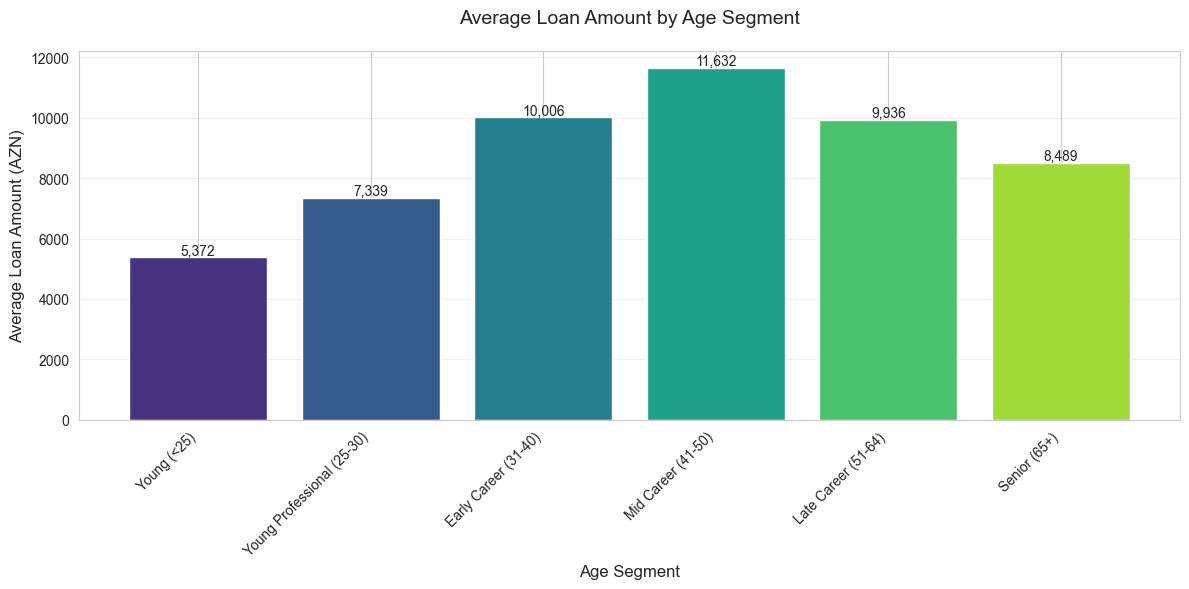


Average Loan Amount by Age Segment:
------------------------------------------------------------
Age Segment                Average Amount         Std Dev
------------------------------------------------------------
Young (<25)                         5,372           5,102
Young Professional (25-30)           7,339           6,380
Early Career (31-40)               10,007           8,754
Mid Career (41-50)                 11,632          10,955
Late Career (51-64)                 9,937           8,568
Senior (65+)                        8,490          14,209

Overall Statistics:
Average Loan Amount: 9,938 AZN
Standard Deviation: 9,229 AZN


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('loan_data.xlsx')

# Convert dates to datetime
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate age and create segments
df['AGE'] = (pd.Timestamp.now() - df['BIRTH_DATE']).dt.days / 365.25

def get_age_segment(age):
    if age < 25:
        return 'Young (<25)'
    elif age <= 30:
        return 'Young Professional (25-30)'
    elif age <= 40:
        return 'Early Career (31-40)'
    elif age <= 50:
        return 'Mid Career (41-50)'
    elif age <= 64:
        return 'Late Career (51-64)'
    else:
        return 'Senior (65+)'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)

# Define segment order
segment_order = [
    'Young (<25)',
    'Young Professional (25-30)',
    'Early Career (31-40)',
    'Mid Career (41-50)',
    'Late Career (51-64)',
    'Senior (65+)'
]

# Calculate average loan amounts
avg_amounts = df.groupby('AGE_SEGMENT')['AMOUNT'].mean().reindex(segment_order)

# Create the plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(segment_order))

# Plot bars
bars = plt.bar(range(len(avg_amounts)), avg_amounts, color=colors)

# Customize the plot
plt.title('Average Loan Amount by Age Segment', pad=20, fontsize=14)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Average Loan Amount (AZN)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Set x-axis labels
plt.xticks(range(len(segment_order)), segment_order, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print statistics
print("\nAverage Loan Amount by Age Segment:")
print("-" * 60)
print(f"{'Age Segment':<25} {'Average Amount':>15} {'Std Dev':>15}")
print("-" * 60)

for segment in segment_order:
    avg = df[df['AGE_SEGMENT'] == segment]['AMOUNT'].mean()
    std = df[df['AGE_SEGMENT'] == segment]['AMOUNT'].std()
    print(f"{segment:<25} {avg:>15,.0f} {std:>15,.0f}")

# Calculate overall statistics
overall_avg = df['AMOUNT'].mean()
overall_std = df['AMOUNT'].std()
print("\nOverall Statistics:")
print(f"Average Loan Amount: {overall_avg:,.0f} AZN")
print(f"Standard Deviation: {overall_std:,.0f} AZN")

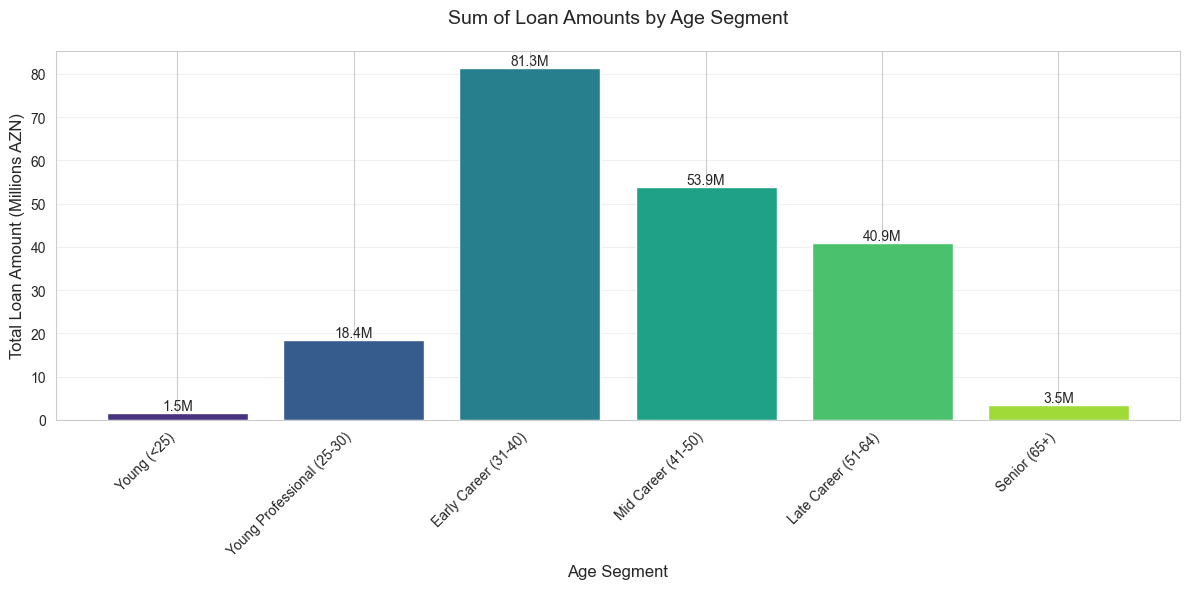


Sum of Loan Amounts by Age Segment:
----------------------------------------------------------------------
Age Segment               Total Amount (M)      Percentage
----------------------------------------------------------------------
Young (<25)                           1.5M            0.8%
Young Professional (25-30)            18.4M            9.2%
Early Career (31-40)                 81.3M           40.8%
Mid Career (41-50)                   53.9M           27.0%
Late Career (51-64)                  40.9M           20.5%
Senior (65+)                          3.5M            1.8%

Overall Statistics:
Total Loan Amount: 199.5M AZN
Average Segment Amount: 33.3M AZN
Median Segment Amount: 29.6M AZN


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_excel('loan_data.xlsx')

# Convert dates to datetime
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate age and create segments
df['AGE'] = (pd.Timestamp.now() - df['BIRTH_DATE']).dt.days / 365.25

def get_age_segment(age):
    if age < 25:
        return 'Young (<25)'
    elif age <= 30:
        return 'Young Professional (25-30)'
    elif age <= 40:
        return 'Early Career (31-40)'
    elif age <= 50:
        return 'Mid Career (41-50)'
    elif age <= 64:
        return 'Late Career (51-64)'
    else:
        return 'Senior (65+)'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)

# Define segment order
segment_order = [
    'Young (<25)',
    'Young Professional (25-30)',
    'Early Career (31-40)',
    'Mid Career (41-50)',
    'Late Career (51-64)',
    'Senior (65+)'
]

# Calculate sum of loan amounts
sum_amounts = df.groupby('AGE_SEGMENT')['AMOUNT'].sum().reindex(segment_order) / 1_000_000  # Convert to millions

# Create the plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(segment_order))

# Plot bars
bars = plt.bar(range(len(sum_amounts)), sum_amounts, color=colors)

# Customize the plot
plt.title('Sum of Loan Amounts by Age Segment', pad=20, fontsize=14)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Total Loan Amount (Millions AZN)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}M',
             ha='center', va='bottom')

# Set x-axis labels
plt.xticks(range(len(segment_order)), segment_order, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print statistics
print("\nSum of Loan Amounts by Age Segment:")
print("-" * 70)
print(f"{'Age Segment':<25} {'Total Amount (M)':>15} {'Percentage':>15}")
print("-" * 70)

for segment in segment_order:
    amount = sum_amounts[segment]
    percentage = (amount / sum_amounts.sum()) * 100
    print(f"{segment:<25} {amount:>15.1f}M {percentage:>14.1f}%")

print("\nOverall Statistics:")
print(f"Total Loan Amount: {sum_amounts.sum():.1f}M AZN")
print(f"Average Segment Amount: {sum_amounts.mean():.1f}M AZN")
print(f"Median Segment Amount: {sum_amounts.median():.1f}M AZN")